# SPICE

SPICE es una abreviabiación de *Simulation Program with Integrated Circtuit Emphasis*. Se trata básicamente de un método estándar para describir circuitos usando texto plano en lugar de una representación gráfica (o esquemática). A esta descripción en texto se la llama también **netlist** y básicamente se corresponde con la lista de los componentes del circuito y cómo estos están conectados entre sí, es decir, de los nodos de unión. Los ficheros netlist pueden tener extensiones .cir, .net, .ckt, ó .sp y es muy común encontrárselos con cualquiera de estas.

SPICE podría enmarcarse como un lenguange específico de dominio ya que la programación esta orientada para una clase muy específica de problemas como el de la creación de circuitos.

Existen en el mercado muchas variantes (intérpretes) de Spice, aunque el original fue descrito en la Universidad de Berkeley. En la lista de intérpretes de Spice tenemos desde esfuerzos y proyectos comerciales hasta open source y regidos por distintas comunidades de usuarios y programadores como:
   

| Intérprete | Licencia | Fabricante | Características |
| -- | -- | -- | -- |
| [Ahkab](https://ahkab.github.io/ahkab/) | GPL | Giuseppe Venturini	 | Basado en Python |
| [WinSpice3](http://www.winspice.com/) | Freeware | WINSPICE.COM	 | Sin soporte en Windows 10 y Linux |
| [PSpice](https://www.pspice.com/) | Multiples Licencias | OrCad	 |  Mas de 33.000 modelos de diferentes dispositivos de principales fabricantes |
| [TINA](https://www.tina.com/es/) | Por número de usuarios | DesignSoft	 | Disponible en cloud |
| [NGSPICE](http://ngspice.sourceforge.net/) | BSD | NGSPICE	 | Desarrollado en C |
| [LTspice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html)  | Freeware | Analog Devices/Linear Technology	 | Existen versiones de este software desde 1999 |
| [KiCad](https://kicad.org/)  | GNU | Jean-Pierre Charras | Desarrollado en C++ |

Spice es un lenguaje interpretado que necesita de software para poder ejecutar bloques de código mientras que C es un lenguaje compilado, donde únicamente nos basta con ejecutar el fichero artefacto para correr el desarrollo.


# Elementos de un netlist
Como acabamos de comentar, un netlist se corresponde con la codificación de los elementos electrónicos de un circuito y las uniones entre los mismos. Veamos con más concreción qué partes y secciones lo componen.

# Comentarios
La primera línea de un netlist se corresponderá siempre con un comentario. A partir de esta línea se pueden introducir más comentarios pero tienen que ir siempre precedidos de un *. Ejemplo:

    spice
    Mi primer circuito
    * Otro comentario
    * más comentarios

# Dispositivos básicos de un circuito
Los elementos de un netlist son los mismos que encontramos en cualquier circuito eléctrico sencillo, tales como resistencias, condensadores, bobinas, interruptores, hilos y fuentes de alimentación. Para distinguir uno de otro, se reserva una letra característica: V para fuentes de alimentación, R para resistencias, C para condensadores y L para bobinas. También es posible usar estas letras en su versión en minúscula (r, v, c, l, etc.). Después de esta letra característica se puede sufijar cualquier texto para diferenciar un elemento de otro (números, letras, palabras, etc.). Ejemplo:

    * Una resistencia 
    R1 
    * Otra resistencia 
    R2 
    * Fuente de alimentación 
    V 
    * Un condensador 
    Cprincipal

# Conexiones
A continuación de indicar el elemento eléctrico, tenemos que informar a Spice cuáles son los puntos de unión tanto a un lado como al otro del elemento. Así es como Spice sabe qué está conectado a qué: porque comparten un **punto** (o **nodo**, aunque este término se reserva sobretodo a uniones de más de dos elementos) que hemos señalizado correctamente. Para nombrar nodos, lo mejor es emplear una numeración secuencial: 0...n. **La enumeración de los puntos de unión es completamente a nuestro criterio.**

    * Una resistencia
    * entre cables 0 y 1
    R1 0 1
 
**Sólo es necesario seguir un criterio**: en el caso de una fuente de alimentación, el nodo que pondremos primero será aquel que está más cerca del borne positivo. Ejemplo:

    spice
    * Para una fuente indicamos primeramente conexión a nodo positivo. 
    v 2 3 type=vdc vdc=1

En el caso de *LTspice* no es necesario indicar los parámetros type=vdc y vdc=X, sino que si no se especifica nada, se supone que el último valor es el del voltaje a corriente continua:

     spice
    * Especificación de una fuente de alimentación de 10 V en corriente continua en el caso de LTspice.
    v 0 1 10
   
Aquí tienes un ejemplo gráfico de los componentes comentados justo arriba (resistencia y voltaje):

![Circuito](E:\Universidad\UNIR\ImagenesTrabajos\ImagenCircuito.png)


# Unidades en SPICE
Las unidades de las magnitudes características del circuito son siempre unidades del Sistema Internacional y no es necesario indicarlo explícitamente en el netlist.

La forma de especificar múltiplos de estas cantidades es añadiendo una letra. Básicamente las que nos interesan y las que suelen aparecer mayoritariamente son las que se muestran en la siguiente tabla:
 
| Prefijo | Unidad | Valor Numerico |
| -- | -- | -- |
| T | Tera | 1000000000000 | 
| G | Giga | 1000000000 | 
| MEG | Mega | 1000000 | 
| K | Kilo | 1000 | 
| m | milli | 0.001 | 
| u | micro | 0.000001 | 
| n | nano | 0.000000001 | 
| p | pico | 0.000000000001 | 
| f | femto | 0.000000000000001 | 
| mil | thou | 0.0000254 | 

En el caso de las fuentes de alimentación hemos de especificar si se trata de corriente contínua (vdc) o alterna (ac).

    * Una resistencia de 5 Ohmios
    R2 1 0 5
    * Una pila de 10 Voltios (continua)
    V1 1 0 type=vdc vdc=10
    * Una resistencia de 5 kΩ
    RX 2 4 5k
 
A continuación se muestran las unidades del Sistema Internacional relacionadas con los circuitos en general:

| Símbolo | Unidad |
| -- | -- |
| Hz | Hercio | 
| V | Voltio | 
| A | Amperio | 
| C | Culombios |
| Ω | Ohmio | 


# Valores iniciales
Aparecen justo al final de la definición del componente (ic). Suelen aplicarse principalmente con condensadores.

    * Una condensador inicialmente no cargado
    c 1 0 1u ic=0

# Fin del circuito
El fin de la descripción de un netlist se especifica mediante el comando .end.

     spice
     * Mi primer circuito
     V 1 0 vdc=10 type=vdc
     R 1 0 5
     * Fin del circuito
     .end
 
#  Comandos SPICE para circuitos en corriente continua
Además de la descripción del circuito, hemos de indicar al intérprete de Spice qué tipo de análisis queremos realizar en sobre el mismo y cómo queremos presentar la salida de la simulación. Los comandos en Spice empiezan por un . y suelen escribirse justo al final del circuito, pero antes del comando .end.

    Mi primer circuito
    * Aquí van los componentes
    R 1 0 6k
    ...
    * Comandos
    .op
    ...
    * Fin del circuito
    .end
    
Veamos los principales comandos de simulación:

- .op es el comando más sencillo que podemos emplear en. Devuelve el voltaje e intensidad en cada ramal y componente del circuito. Este comando no necesita parámetros.
- .dc es uy parecido al comando .op pero nos permite cambiar el valor del voltaje de una fuente de alimentación en pasos consecutivos entre el valor A y el valor B. En el caso de que la fuente tuviera asignada ya un valor para su voltaje, este sería ignorado. Ejemplo:

      spice
      * Variamos el valor del voltaje
      * de la fuente "v" de 1 a 1000
      * en pasos de 5 voltios
      v 1 0 type=vdc vdc=10
      .dc v 1 start=1 stop=1000 step=20
      v2a 2 4 type=vdc vdc=9
      * Igual para v2a. Se ignora su voltaje de 9V
      .dc v2a start=0 stop=10 step=2
    
- El comando .tran realiza un análisis en el tiempo de los parámetros del circuito. Si no se emplea la directiva uic (use initial conditions) o esta es igual a cero, este análisis se realiza desde el punto estable de funcionamiento del circuito hasta un tiempo tfinal. y en intervalos tstep. Si empleamos un varlor distinto para parámetro uic, entonces se hará uso de las condiciones iniciales definidas para cada componente (típicamente ic=X en el caso de los condensadores, que da cuenta de la carga incial que estos pudieran tener).
    
      * Hacemos avanzar el tiempo entre
      * tinicial y tfinal en pasos tstep
      .tran tstart=X tstop=Y tstep=Z uic=0/1/2/3
    
X, Y y Z tienen, evidentemente unidades de tiempo en el S.I. (segundos).

El parámetro *uic* se usa para especificar el estado del circuito en un determinado momento y tiene los siguientes posibles valores: 

| Valor | Descripción |
| -- | -- |
| 0 | Todos los voltajes y corrientes de los nodos fuente v/h/e/ se asumirán como 0 en tinicial.  | 
| 1 | El valor en tinicial será el último resultado de un análisis OP. | 
| 2 | El valor en tinicial es el último resultado de un análisis OP en el que se establecen los valores de corrientes a través de inductores y voltajes en  condensadores especificados en sus iconos. | 
| 3 | Se carga una condición inicial suministrada por el usuario. Esto requiere de un .ic en algún lugar del netlist y el nombre debe coicidir con el de ic_label. |

# Ahkab

[Ahkab](https://ahkab.github.io/ahkab/) es una impementación open source en Python del estándar de Spice desarrollado por Giuseppe Venturini cuya licencia es GPL. La última versión disponible de Ahkab es 0.18 y redistribuye el módulo py3compat.py desarrollado por Jinja team en 2013. Existen bastantes ejemplos de netlists en el directorio tests del repositorio, aun así, a continuación mostramos el siguiente circuito:

## Circuito sencillo para trabjar con la ley de Ohm:

La mal llamada ley de Ohm reza que el voltaje (la energía por unidad de carga) que se disipa en un tramo de un circuito eléctrico es equivalente a la intensidad (I) de la corriente (es decir, cuántos electrones circulan por unidad de tiempo) por la resistencia del material (R) en el que está desplazándose dicha corriente. Matemáticamente:

$$ Voltaje (Voltios) = Intensidad(Amperios) · Resistencia (Ω - Ohmios) $$

Siguiendo la ley de Ohm, se necesita 1 Voltio para hacer pasar 1 amperio por una resistencia de 1 ohmio de tal manera que: 

![leyOhm](E:\Universidad\UNIR\ImagenesTrabajos\LeyOhm.png)

Vamos a escribir su contenido (componentes o netlist) en disco con el nombre circuito sencillo.sp. Esto lo podemos lograr directamente y en tiempo real desde una celda de Jupyter gracias a los comandos mágicos de este entorno de programación literaria. En concreto vamos a utilizar %%writefile que guarda los contenidos de una celda como un fichero.

In [1]:
%%writefile "circuito_sencillo.sp"
* Este es un circuito sencillo
r1 1 0 10
v1 0 1 type=vdc vdc=9
.op
.dc v1 start=0 stop=9 step=1
.end

Overwriting circuito_sencillo.sp


Ahora vamos a leer su descripción con Ahkab, interpretar y ejecutar las simulaciones que en él estén descritas. Adicionalmente importamos PyLab, un conglomerado de varias librerías entre las que se incluyen numpy, scipy, sympy, pandas, matplotlib, ipython:



In [2]:
import pylab as plt
import ahkab

#Se añade para poder hacer show de las graficas.
%matplotlib inline 

circuito_y_analisis = ahkab.netlist_parser.parse_circuit('circuito_sencillo.sp')




W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.


Separamos la información del netlist (componentes) de los análisis (uno de tipo op y otro de tipo dc):

In [3]:
circuito = circuito_y_analisis[0]
analisis_en_netlist = circuito_y_analisis[1]
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito, analisis_en_netlist)
print(lista_de_analisis)
#print(type(circuito_y_analisis))


[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN'}]


Ahkab utiliza tuplas para poder parsear netlists por ello creamos *lista_de_análisis* con los datos del *circuito_sencillo.sp*

Las simulaciones que implican listas de datos (.dc, .tran, etc.) necesitan de un fichero temporal (outfile) donde almacenar los resultados. Para ello tenemos que definir la propiedad outfile.

In [4]:
lista_de_analisis[1]['outfile'] = "simulacion_dc.tsv"
loopindex = 0

for item in lista_de_analisis:
  print(item)
  for key, value in item.items():
    if key == 'type' and value == 'dc':
      lista_de_analisis[loopindex]['outfile'] = "simulacion_dc.tsv"
    elif key == 'type' and value == 'tran':
      lista_de_analisis[loopindex]['outfile'] = "simulacion_tran.tsv"
  loopindex = loopindex + 1
  
[i for i, d in enumerate(lista_de_analisis) if "dc" in d.values()][0] 

{'type': 'op', 'guess': True, 'x0': None}
{'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN', 'outfile': 'simulacion_dc.tsv'}


1

Una vez que ya hemos separado netlists de simulaciones, ahora ejecutamos las segundas (¡todas a la vez!) gracias al método .run de Ahkab:



In [5]:
resultados = ahkab.run(circuito, lista_de_analisis)


Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...  -\ done.
Solving...  -\ done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting DC analysis:
Solving...  -\|/-\|/-\|done


## Resultados de la simulación .dc
Imprimimos información sobre la simulación de tipo .dc:

In [6]:
print(resultados['dc'])

<DC simulation results for '* este es un circuito sencillo' (netlist circuito_sencillo.sp). LIN sweep of V1 from 0 to 9 V. Run on 2021-01-04 19:50:10, data file simulacion_dc.tsv>


Veamos qué variables podemos dibujar para el caso del análisis dc.

In [7]:
print(resultados['dc'].keys())

['V1', 'V1', 'I(V1)']


Y ahora graficamos el resultado del análisis anterior. Concretamente vamos a representar el voltaje en el borne 1 (V1) con respecto a la intensidad del circuito (I(V1)).

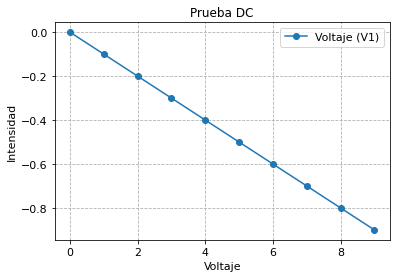

In [8]:
figura = plt.figure()
plt.title("Prueba DC")
plt.plot(resultados['dc']['V1'], resultados['dc']['I(V1)'], label="Voltaje (V1)", marker='o');

plt.legend(loc='best')
plt.ylabel('Intensidad')
plt.xlabel('Voltaje')
plt.grid(True, linestyle='--')

plt.show()

## Resultados de la simulación .op
El método .results nos devuelve un diccionario con los resultados de la simulación.

In [9]:
print(resultados['op'].results)


{V1: -9.0, I(V1): -0.9}


**Pregunta: justifica el sencillo resultado anterior (análisis op). Repite el cálculo con Sympy, atendiendo con mimo a las unidades y al formateo de los resultados (tal y como hemos visto en muchos otros notebooks en clase).**

## Resolución del mismo circuito pero con LTspice
¿Cómo? ¿Es esto posible? ¿Desde Jupyter? Sí! Pero primero, por comodidad, deberíamos crear un alias del comando que apunte a nuestro ejecutable. Además, con un poco de inteligencia, podemos adelantarnos al hecho de si estamos en Windows o macOS:

In [10]:
import platform

#Usamos -b para correr en modo batch y -ascii para interpretar los ficheros .raw.

%alias lts E:\Universidad\Software\LTSpice\XVIIx64.exe -ascii -b

Ejecuta esta línea para que se escriba el fichero siguiente. Para LTspice, vamos a reservar la extensión .net:



In [11]:
%%writefile "circuito_sencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 100
v1 0 1 9
.op
* Comentamos el análisis .dc para centrarnos primero en el .op
* .dc v1 1 10 
.end

Overwriting circuito_sencillo.net


Ejecutamos LTspice con el circuito (de la misma manera que antes habíamos hecho con Ahkab).



In [12]:
lts "circuito_sencillo.net"


Veamos el contenido de la simulación.



In [13]:
%pycat circuito_sencillo.log


Ahora repitamos lo mismo para el análisis .dc:



In [14]:
%%writefile "circuito_sencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 100
v1 0 1 9
* Ahora obviamos el análisis .op
* .op
.dc v1 1 10 
.end

Overwriting circuito_sencillo.net


In [15]:
lts "circuito_sencillo.net"


Al ejecutar esta simulación, se genera un fichero .raw con los resultados. Es muy parecido al outfile que hemos empleado antes con Ahkab. Para leer este fichero, tenemos que usar el paquete ltspice de Python, el cual podéis instalar directamente desde Jupyter:

In [16]:
!pip install ltspice


Ahora ya podemos leer este fichero .raw y pintar una recta de voltaje muy parecida a la que obtuvimos anteriormente con Ahkab:



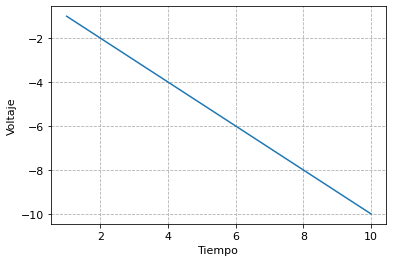

In [17]:
import ltspice

l = ltspice.Ltspice("circuito_sencillo.raw")
l.parse()

tiempo = l.get_time()
voltaje = l.get_data('V(1)')
corriente = l.get_data('I(V1)')

# Podemos pintar la corrente en función del tiempo
# plt.plot(tiempo, corriente)
# O el voltaje

plt.plot(tiempo, voltaje);
plt.grid(True, linestyle='--')
plt.xlabel('Tiempo')
plt.ylabel('Voltaje')

plt.show()

En resumen: hemos usado dos compiladores Spice distintos para hacer el mismo ejercicio. De igual manera podríamos haber usado Ngspice u otro. De hecho, podíamos haber usado Ahkab en modo comando. Si tenemos correctamente instalado este framework, en princpio podemos invocarlo directamente desde línea de comandos:

In [18]:
!ahkab "circuito_sencillo.sp"


2021-01-04 19:50:15
ahkab v. 0.18 (c) 2006-2015 Giuseppe Venturini

Operating Point (OP) analysis

Netlist: circuito_sencillo.sp
Title: * este es un circuito sencillo
At 300.00 K
Options:
	vea = 1.000000e-06
	ver = 0.001000
	iea = 1.000000e-09
	ier = 0.001000
	gmin = 0.000000e+00

Convergence reached in 2 iterations.

RESULTS:

Variable    Units      Value        Error    %
----------  -------  -------  -----------  ---
V1          V           -9    9.00002e-12    0
I(V1)       A           -0.9  0              0

ELEMENTS OP INFORMATION:



Traceback (most recent call last):
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'matplotlib'
W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.
Traceback (most recent call last):
  File "c:\users\sosa\scoop\apps\miniconda3\current\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\sosa\scoop\apps\miniconda3\current\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\sosa\scoop\apps\miniconda3\current\scripts\ahkab.exe\__main__.py", line 7, in <module>
  File "c:\users\sosa\scoop\apps\miniconda3\current\lib\site-packages\ahkab\__main__.py", line 156, in _cli
    outfile=cli_options.outfile, verbose=verbose)
  File "c:\users\sosa\scoop\apps\miniconda3\current\lib\site-packages\ahkab\ahkab.py", line 953, in main
    results.update(run(circ, [an]))
  File "c:\users\sosa\scoop\apps\miniconda3\current\lib\site-packages\ahkab\ah

## Análisis de circuito con resistencias en serie
Vamos a resolver (en punto de operación) el siguiente circuito: ![imagen](E:\Universidad\UNIR\ImagenesTrabajos\ImagenCircuito2.png)

Al igual que antes, grabamos el netlist en disco desde Jupyter gracias a la palabra mágica %writefile. Más info aquí.




In [19]:
%%writefile "resistencias_en_serie.net"
* circuito con tres resistencias en serie
v1 1 0 type=vdc vdc=9
R1 0 2 3k
R2 2 3 10k  
R3 3 1 5k
* análisis del circuito
.op
.end

Overwriting resistencias_en_serie.net


In [20]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit('resistencias_en_serie.net')
circuito = circuito_y_analisis[0]       
analisis_en_netlist = circuito_y_analisis[1]
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito, analisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_analisis)


Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...  -\ done.
Solving...  -\ done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimos los resultados del análisis .op:



In [21]:
print(resultados['op'])


OP simulation results for '* circuito con tres resistencias en serie'(netlist resistencias_en_serie.net).
Run on 2021-01-04 19:50:15, data file None.
Variable    Units      Value     Error    %
----------  -------  -------  --------  ---
V1          V         9       -9e-12      0
V2          V         1.5     -1.5e-12    0
V3          V         6.5     -6.5e-12    0
I(V1)       A        -0.0005   0          0


Las cantidades V1, V2 y V3 hacen referencia a los distintos valores del potencial que se ha perdido en cada uno de los bornes que has elegido para describir el netlist (1, 2, etc.). Por ejemplo, podemos calcular el potencial consumido por la resistencia R1 y verás que coincide con el del punto V2 devuelto por Ahkab. **Ejercicio: compruébalo tú mismo y refléjalo por escrito.

Cargamos primero todo lo relacionado con Sympy:

In [22]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to

In [23]:
r1 = 3E3*ohms
rtotal = 3E3*ohms + 10E3*ohms + 5E3*ohms
voltage = 9*volts
intensidad_ahkab = resultados['op']['I(V1)'][0][0]*amperes
v2 = convert_to(intensidad_ahkab*r1, [volts])
print("Resistencia total: ", rtotal)
print("Voltaje: ", voltage)
print("Intensidad: ", convert_to(voltage/rtotal,amperes))

Resistencia total:  18000.0*ohm
Voltaje:  9*volt
Intensidad:  0.0005*ampere


In [24]:
from sympy.physics.units import kilo
from sympy import solve, symbols, Eq
v1 = 9*volts
r1 = 3*kilo*ohms
r2 = 10*kilo*ohms
r3 = 5*kilo*ohms
r_total = r1 + r2 + r3
intensidad = symbols('i')
ley_ohm = Eq(v1, intensidad*r_total)
solucion_para_intensidad = solve(ley_ohm, intensidad)
sol_inten = convert_to(solucion_para_intensidad[0], [amperes]).n(2)

Al tratar con un circuito en serie, la corriente que circula y pasa por toda las cargas es la misma. Así mismo, la suma de las tensiones en cada resistencia es la tensión de la fuente. Lo podemos demostrar de la siguiente manera para este circuito:

In [25]:
# Pasamos las resistencias de kiloOhmios a Ohmios y lo multiplicamos por la intensidad
res1 = (r1*1000)*sol_inten
res2 = (r2*1000)*sol_inten
res3 = (r3*1000)*sol_inten

# Sumamos los valores
sumatorio = res1 + res2 + res3
print(sumatorio)

9.0*ampere*ohm*Prefix(kilo, k, 3, 10)


## Análisis .op de circuitos con resistencias en paralelo
Vamos a complicar un poco el trabajo añadiendo elementos en paralelo.

![imagen](E:\Universidad\UNIR\ImagenesTrabajos\ImagenCircuito3.png)

## Primer circuito:



In [26]:
%%writefile "resistencias_en_paralelo_1.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
r1 1 2 1k
r2 2 0 470
r3 2 3 220
r4 3 0 1.5k
.op
.end

Overwriting resistencias_en_paralelo_1.cir


In [27]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit('resistencias_en_paralelo_1.cir')
circuito = circuito_y_analisis[0]       
analisis_en_netlist = circuito_y_analisis[1]
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito, analisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_analisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...  -\ done.
Solving...  -\ done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimimos los resultados del análisis .op. Como puedes comprobar, Ahkab sólo reporta la intensidad de corriente en las ramas en las que hay una pila (en este caso, la rama donde está la pila VDD).

In [28]:
print(resultados['op'])


OP simulation results for '* resistencias en paralelo'(netlist resistencias_en_paralelo_1.cir).
Run on 2021-01-04 19:50:15, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V2          V         -3.23533     3.23532e-12    0
V3          V         -2.8215      2.82151e-12    0
I(VDD)      A         -0.00876467  0              0


## Segundo circuito:

In [29]:
%%writefile "resistencias_en_paralelo_2.cir"
* resistencias en paralelo ejercicio 2
v1 0 1 type=vdc vdc=9
r1 1 2 47
r2 2 3 220
r4 3 4 1k
r5 4 0 560
v2 0 5 type=vdc vdc=1.5
r3 5 2 180
.op
.end


Overwriting resistencias_en_paralelo_2.cir


In [30]:
circuito_y_analisis_2 = ahkab.netlist_parser.parse_circuit('resistencias_en_paralelo_2.cir')
circuito_2 = circuito_y_analisis_2[0]       
analisis_en_netlist_2 = circuito_y_analisis_2[1]
lista_de_analisis_2 = ahkab.netlist_parser.parse_analysis(circuito_2, analisis_en_netlist_2)
resultados_2 = ahkab.run(circuito_2, lista_de_analisis_2)
print(resultados_2['op'])


Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...  -\ done.
Solving...  -\ done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo ejercicio 2'(netlist resistencias_en_paralelo_2.cir).
Run on 2021-01-04 19:50:15, data file None.
Variable    Units         Value        Error    %
----------  -------  ----------  -----------  ---
V1          V        -9          8.99997e-12    0
V2          V        -7.29441    7.29442e-12    0
V3          V        -6.39285    6.39285e-12    0
V4          V        -2.29487    2.29487e-12    0
V5          V        -1.5        1.5e-12        0
I(V1)       A        -0.0362891  0              0
I(V2)       A         0.0321912  0              0


## Ejercicio 3

In [31]:
%%writefile "resistencias_en_paralelo_3.cir"
* resistencias en paralelo ejercicio 3
v 0 1 type=vdc vdc=9
v1 1 2 type=vdc vdc=0
v2 1 3 type=vdc vdc=0
v3 1 4 type=vdc vdc=0
r1 2 0 10k
r2 3 0 2k
r3 4 0 1k
.op
.end

Overwriting resistencias_en_paralelo_3.cir


In [32]:
circuito_y_analisis_3 = ahkab.netlist_parser.parse_circuit('resistencias_en_paralelo_3.cir')
circuito_3 = circuito_y_analisis_3[0]       
analisis_en_netlist_3 = circuito_y_analisis_3[1]
lista_de_analisis_3 = ahkab.netlist_parser.parse_analysis(circuito_3, analisis_en_netlist_3)
resultados_3 = ahkab.run(circuito_3, lista_de_analisis_3)
print(resultados_3['op'])

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...  -\ done.
Solving...  -\ done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo ejercicio 3'(netlist resistencias_en_paralelo_3.cir).
Run on 2021-01-04 19:50:15, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V        -9         9e-12    0
V2          V        -9         9e-12    0
V3          V        -9         9e-12    0
V4          V        -9         9e-12    0
I(V)        A        -0.0144    0        0
I(V1)       A        -0.0009    0        0
I(V2)       A        -0.0045    0        0
I(V3)       A        -0.009     0        0


Si nos fijamos, no se muestran las intensidades de algunas ramas de estos circuitos, para ello añadimos algunas fuentes de alimentación de 0V para que se muestren:

## Caso 1 | Ejercicio 1


In [57]:
%%writefile "resistencias_en_paralelo_1_extraps.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
r1 1 2 1k
r2 2 3 470
v1 3 0 type=vdc vdc=0
r3 2 4 220
r4 4 5 1.5k
v2 5 0 type=vdc vdc=0
.op
.end

Overwriting resistencias_en_paralelo_1_extraps.cir


In [58]:
circuito_y_analisis_1_extraps = ahkab.netlist_parser.parse_circuit('resistencias_en_paralelo_1_extraps.cir')
circuito_1_extraps = circuito_y_analisis_1_extraps[0]       
analisis_en_netlist_1_extraps = circuito_y_analisis_1_extraps[1]
lista_de_analisis_1_extraps = ahkab.netlist_parser.parse_analysis(circuito_1_extraps, analisis_en_netlist_1_extraps)
resultados_1_extraps = ahkab.run(circuito_1_extraps, lista_de_analisis_1_extraps)
print(resultados_1_extraps['op'])

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...  -\ done.
Solving...  -\ done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo'(netlist resistencias_en_paralelo_1_extraps.cir).
Run on 2021-01-04 19:55:45, data file None.
Variable    Units           Value         Error    %
----------  -------  ------------  ------------  ---
V1          V        -12            1.2e-11        0
V2          V         -3.23533      3.23532e-12    0
V3          V          0            8.67362e-19    0
V4          V         -2.8215       2.82151e-12    0
V5          V          0           -5.99219e-20    0
I(VDD)      A         -0.00876467   0              0
I(V1)       A         -0.00688367   0              0
I(V2)       A         -0.001881     0              0


Para verificar la Ley de Kirchoff determinamos los sentidos de las intensidades: 
![imagen](E:\Universidad\UNIR\ImagenesTrabajos\circuito1mallas.png)

La fórmula resultante será I1 + I2 + I3 = 0

In [60]:
from sympy.physics.units import amperes


i1 = 0.00876467*amperes
i2 = 0.00688367*amperes
i3 = 0.001881*amperes


print(i1+i2+i3)

0.01752934*ampere


## Caso 2 | Ejercicio 2

In [36]:
%%writefile "resistencias_en_paralelo_2_extraps.cir"
* resistencias en paralelo ejercicio 2
v1 0 1 type=vdc vdc=9
r1 1 2 47
r2 2 3 220
r4 3 4 1k
v3 4 5 type=vdc vdc=0
r5 5 0 560
v2 0 6 type=vdc vdc=1.5
r3 6 2 180
.op
.end

Overwriting resistencias_en_paralelo_2_extraps.cir


In [37]:
circuito_y_analisis_2_extraps = ahkab.netlist_parser.parse_circuit('resistencias_en_paralelo_2_extraps.cir')
circuito_2_extraps = circuito_y_analisis_2_extraps[0]       
analisis_en_netlist_2_extraps = circuito_y_analisis_2_extraps[1]
lista_de_analisis_2_extraps = ahkab.netlist_parser.parse_analysis(circuito_2_extraps, analisis_en_netlist_2_extraps)
resultados_2_extraps = ahkab.run(circuito_2_extraps, lista_de_analisis_2_extraps)
print(resultados_2_extraps['op'])

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...  -\ done.
Solving...  -\ done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo ejercicio 2'(netlist resistencias_en_paralelo_2_extraps.cir).
Run on 2021-01-04 19:50:15, data file None.
Variable    Units          Value        Error    %
----------  -------  -----------  -----------  ---
V1          V        -9           9e-12          0
V2          V        -7.29441     7.29443e-12    0
V3          V        -6.39285     6.39286e-12    0
V4          V        -2.29487     2.29487e-12    0
V5          V        -2.29487     2.29487e-12    0
V6          V        -1.5         1.5e-12        0
I(V1)       A        -0.0362891   0              0
I(V3)       A        -0.00409798  0              0
I(V2)       A         0.0321912   0              0


Para verificar la Ley de Kirchoff determinamos los sentidos de las intensidades: 
![imagen](E:\Universidad\UNIR\ImagenesTrabajos\circuito2mallas.png)

La fórmula resultante será I1 + I2 - I3 = 0

In [38]:
from sympy.physics.units import amperes


i1 = -0.0362891*amperes
i2 = 0.0321912*amperes
i3 = -0.00409798*amperes


print(i1+i2-i3)

8.00000000055964e-8*ampere


# Circuitos en DC que evolucionan con el tiempo
## Carga de un condensador
Vamos a ver qué le pasa a un circuito de corriente continua cuando tiene un condensador en serie.

![imagen](E:\Universidad\UNIR\ImagenesTrabajos\ImagenCircuito4.png)

Al igual que antes, primero guardamos el circuito en un netlist externo:



In [39]:
%%writefile "condensador en continua.ckt"
* Carga condensador
v1 0 1 type=vdc vdc=6
r1 1 2 1k
c1 2 0 1m ic=0
.op
.tran tstep=0.1 tstop=8 uic=0
.end

Overwriting condensador en continua.ckt


Con este circuito buscamos realizar un análisis en el tiempo de los parámetros del circuito por ello ponemos .tran, como comentamos anteriormente. Adicionalmente el parámetro *ic=0* del condensador es empleado para indicar el valor inicial del componente.

Ahora bien, leamos el circuito:

In [40]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit("condensador_en_continua.ckt")


Separamos el netlist de los análisis y asignamos un fichero de almacenamiento de datos (outfile):



In [41]:
circuito = circuito_y_analisis[0]
analisis_en_netlist = circuito_y_analisis[1]
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito, analisis_en_netlist)
lista_de_analisis[1]['outfile'] = "simulación_tran.tsv"

Ejecutamos la simulación:



In [42]:
resultados = ahkab.run(circuito, lista_de_analisis)
print(resultados['op'])
#print(resultados['tran'].keys())

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...  -\ done.
Solving...  -\ done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  -\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-done.
Average time step: 0.0869565
OP simulation results for '* carga condensador'(netlist condensador_en_continua.ckt).
Run on 2021-01-04 19:50:16, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V             -6    6e-12    0
V2          V             -6    6e-12    0
I(V1)       A              0    0        0


Dibujamos la gráfica de carga del condensador con el tiempo, centrándonos en la intensidad que circula por la pila.



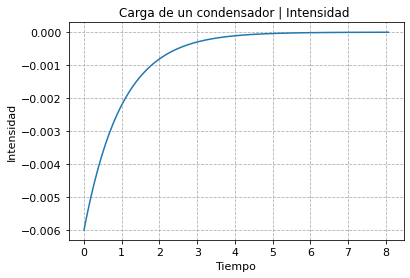

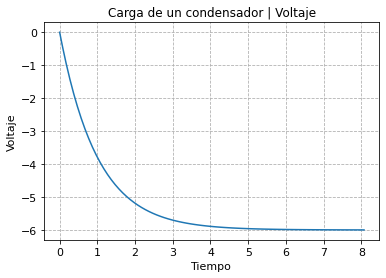

In [43]:
figura = plt.figure()
plt.title("Carga de un condensador | Intensidad ")
plt.grid(True, linestyle='--')
plt.xlabel('Tiempo')
plt.ylabel('Intensidad')
plt.savefig("condensador_en_continua_intensidad")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1)'], label="Intensidad");


figura = plt.figure()
plt.title("Carga de un condensador | Voltaje")
plt.grid(True, linestyle='--')
plt.xlabel('Tiempo')
plt.ylabel('Voltaje')
plt.savefig("condensador_en_continua_voltaje")
plt.plot(resultados['tran']['T'], resultados['tran']['V2'], label="Voltaje condensador");


En estas gráficas se ve muy bien el proceso de carga del condensador, en el cual hasta que no está completamente cargado sigue dejando pasar la corriente. Cuando está cargado el condensador los electrones no pueden pasar por las laminas que lo forman, por ello, la corriente no pasa y intensidad es 0A mientras que el voltaje se mantiene en 6V si tomamos el punto de referencia antes del condensador. En un circuito en corriente continua un condensador actua como si fuese una toma de tierra ya que los electrones van siempre en el mismo sentido y se quedán ahí "parados".

## Carrera de condensadores
Ahora tenemos un circuito con dos condensadores en paralelo:

![imagen](E:\Universidad\UNIR\ImagenesTrabajos\ImagenCircuito5.png)


In [44]:
%%writefile "carrera en condensadores.ckt"
* Carga condensador
v0 0 1 type=vdc vdc=10
r1 0 2 3k
c1 2 3 47u ic=0
v1dummy 3 1 type=vdc vdc=0
c2 2 4 22u ic=0
v2dummy 4 1 type=vdc vdc=0
.tran tstep=0.01 tstart=6.5 tstop=7.5 uic=0
.end

Overwriting carrera en condensadores.ckt


In [45]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("carrera_en_condensadores.ckt")
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[0]['outfile'] = "simulación tran carrera condensadores.tsv"
resultados = ahkab.run(circuito, lista_de_análisis)

Starting transient analysis: 
Selected method: TRAP
Solving...  -\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/done.
Average time step: 0.00900901


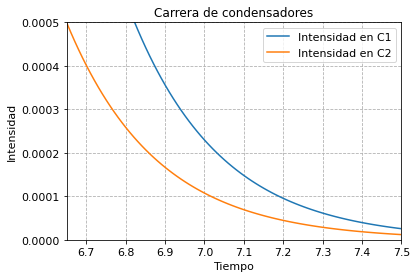

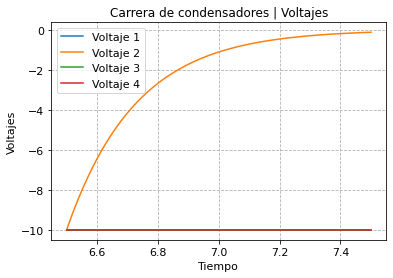

In [46]:
%matplotlib inline 

figura = plt.figure()
plt.title("Carrera de condensadores")
plt.xlim(6.65, 7.5)
plt.ylim(0.0, 0.0005)

plt.plot(resultados['tran']['T'], resultados['tran']['I(V1DUMMY)'],label="Intensidad en C1");
plt.plot(resultados['tran']['T'], resultados['tran']['I(V2DUMMY)'],label="Intensidad en C2");

plt.legend(loc='best')
plt.grid(True, linestyle='--')
plt.xlabel('Tiempo')
plt.ylabel('Intensidad')

plt.show()


figura2 = plt.figure()
plt.title("Carrera de condensadores | Voltajes")

plt.plot(resultados['tran']['T'], resultados['tran']['V1'],label="Voltaje 1");
plt.plot(resultados['tran']['T'], resultados['tran']['V2'],label="Voltaje 2");
plt.plot(resultados['tran']['T'], resultados['tran']['V3'],label="Voltaje 3");
plt.plot(resultados['tran']['T'], resultados['tran']['V4'],label="Voltaje 4");

plt.legend(loc='best')
plt.grid(True, linestyle='--')
plt.xlabel('Tiempo')
plt.ylabel('Voltajes')

plt.show()

## Así quedaría si hiciesemos la simulación con LTspice: 

In [47]:
lts "carrera_en_condensadores.ckt"


In [48]:
import ltspice

l = ltspice.Ltspice("carrera_en_condensadores.raw")
l.parse()

tiempo = l.get_time()
voltaje1 = l.get_data('V(1)')
voltaje2 = l.get_data('V(2)')
voltaje3 = l.get_data('V(3)')
voltaje4 = l.get_data('V(4)')
corriente = l.get_data('I(V1)')

# Podemos pintar la corrente en función del tiempo
# plt.plot(tiempo, corriente)
# O el voltaje

plt.plot(tiempo, voltaje1);
plt.plot(tiempo, voltaje2);
plt.plot(tiempo, voltaje3);
plt.plot(tiempo, voltaje4);
plt.grid(True, linestyle='--')
plt.xlabel('Tiempo')
plt.ylabel('Voltaje')

plt.show()

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'carrera_en_condensadores.raw'

## Circuitos en corriente alterna


In [49]:
%%writefile "corriente_alterna.net"
* Circuito en corriente alterna
v1 1 0 sin(0 120 60 0 0)
r1 0 1 10k
.tran 1
.end

In [50]:
lts "corriente_alterna.net"

In [51]:
%pycat corriente_alterna.log

In [52]:
import ltspice
%matplotlib inline 

l = ltspice.Ltspice("corriente_alterna.raw")
l.parse()
tiempo = l.get_time()
voltaje = l.get_data('V(1)')
instensidad = l.get_data('I(V1)')

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Voltaje | Volts ', color=color)
ax1.plot(tiempo, voltaje, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Intensidad | Amperios ', color=color)  
ax2.plot(tiempo, instensidad, color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.set_size_inches(15, 3)

plt.show()



Ahora con Ahkab:

In [53]:
%%writefile "corriente_alterna2.sp"
* Circuito en corriente alterna
v1 1 0 type=sin VO=0 VA=120 FREQ=60 TD=0 THETA=0
r1 0 1 10k
.tran tstep=0.25 tstart=0 tstop=1
.end

In [54]:
import pylab as plt
import ahkab

#Se añade para poder hacer show de las graficas.
%matplotlib inline 

circuito_y_analisis = ahkab.netlist_parser.parse_circuit('corriente_alterna2.sp')

circuito = circuito_y_analisis[0]
analisis_en_netlist = circuito_y_analisis[1]
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito, analisis_en_netlist)
lista_de_analisis[0]['outfile'] = "corriente_alterna2.tsv"
resultados = ahkab.run(circuito, lista_de_analisis)
#print(resultados['tran'].keys())


fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Voltaje | Volts ', color=color)
ax1.plot(resultados['tran']['T'], resultados['tran']['V1'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Intensidad | Amperios ', color=color) 
ax2.plot(resultados['tran']['T'], resultados['tran']['I(V1)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.set_size_inches(15, 3)

plt.show()

